In [8]:
import datetime
import numpy as np
#import pandas.io.data as web
from scipy.stats import norm
from pandas_datareader import data as web
import matplotlib.pyplot as plt

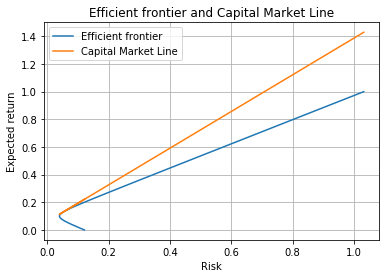

In [13]:
Return=np.linspace(0,1,100)
sigma=(1.3125*Return**2-0.2625*Return+0.014725)**(0.5)
CML=0.06+1.327367*sigma
plt.plot(sigma,Return)
plt.plot(sigma,CML)
plt.xlabel("Risk")
plt.ylabel("Expected return")
plt.title("Efficient frontier and Capital Market Line")
plt.legend(["Efficient frontier","Capital Market Line"])
plt.grid()
plt.show()

In [10]:
def var_cov_var(P, c, mu, sigma):
    alpha = norm.ppf(1-c, mu, sigma)
    return P - P*(alpha + 1)

if __name__ == "__main__":
    start = datetime.datetime(2017, 1, 1)
    end = datetime.datetime(2020, 1, 1)

    netflix = web.DataReader("NFLX", "yahoo", start, end)
    netflix= netflix["Adj Close"].pct_change()

    P = 1000  # 1,000 USD    
    c = 0.95  # 95% confidence interval
    mu = np.mean(netflix)
    sigma = np.std(netflix)

    var = var_cov_var(P, c, mu, sigma)
    print ("Value-at-Risk: $%0.4f" % var)
   

Value-at-Risk: $36.8789


In [12]:
print ("mean : $%0.4f" % mu)
print ("variance: $%0.4f" % sigma**2)
print ("Value-at-Risk: $%0.4f" % var)

mean : $0.0015
variance: $0.0005
Value-at-Risk: $36.8789
